---
Brute force time is:  0.0033508839551359415
Closest Manhattan distance:  16
Two points are:  (1883, 1202) and (1894, 1197)
---
Divide conquer time is:  0.0010333950049243867
Closest Manhattan distance:  16
Two points are:  (1883, 1202) and (1894, 1197)
---


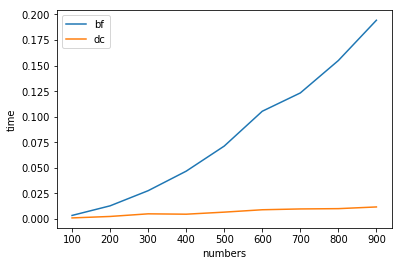

In [2]:
# 2017 S2 FIT5211 Assignment 1
# Duo Pan
# 27554074

from math import *
import random
import timeit
import matplotlib.pyplot as plt



class Point:
    # base methods
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def distance_from_origin(self):
        return sqrt(self.x * self.x + self.y * self.y)
    
    def distance(self, other):
        dx = self.x - other.x
        dy = self.y - other.y
        return sqrt(dx * dx + dy * dy)
    
    def translate(self, dx, dy):
        self.x += dx
        self.y += dy
        
    def __str__(self):
        return "(" + str(self.x) + ", " + str(self.y) + ")"
    
    def __eq__(self, other):
        return self.x == other.x
    
    def __gt__(self, other):
        return self.x > other.x
    
    def __lt__(self, other):
        return self.x < other.x
    
    # task 1 Manhattan distance
    def manhattan(self, other):
        return abs(self.x - other.x) + abs(self.y - other.y)

# task 2 init, insert, delete methods and other auxiliary methods
class PointSet:
    def __init__(self, init=None):
        if init is None:
            self.contents = []
        else:
            self.contents = init  
    
    def __len__(self):
        return len(self.contents)
    
    def display(self):
        for item in self.contents:
            print(item)
    
    def is_empty(self):
        return self.contents == []
    
    # binary search, get the right index, called by insert() and remove()
    def findPosition(self, elem):
        low = 0  
        high = len(self) - 1  
        while low <= high:  
            mid = (high + low) // 2  
            if self.contents[mid] == elem:  
                return mid, 1  
            elif self.contents[mid] > elem:  
                high = mid - 1  
            else:  
                low = mid + 1  
        return low, 0
    
    # insert Point by x ascending order
    def insert(self, elem):
        index, isfind = self.findPosition(elem)  
        if isfind == 1:
            # do not accept 2 points with the same x,y
            return False
        else:
            self.contents.insert(index, elem) 
            return True
    
    # remove elem from the set
    def remove(self, elem):
        index, isfind = self.findPosition(elem) 
        if isfind == 1:
            self.contents.pop(index)
        else:
            print(elem,end=' ')
            print("is not in the set")
        
    def removeAll(self):
        self.contents = []
            
    def getXS(self):
        xs = []
        for item in self.contents:
            xs.append(item.x)
        return xs
                
    def getYS(self):
        ys = []
        for item in self.contents:
            ys.append(item.y)
        return ys      

    def closestDisByBF(self):
        if len(self) < 2:
            print("Please make sure there are more than 2 points in the set.")
            return
        minDis = float('inf')
        for i in range(0,len(self)):
            for j in range(i+1,len(self)):
                curDis = self.contents[i].manhattan(self.contents[j])
                if minDis > curDis:
                    minDis = curDis
                    P = Point(self.contents[i].x, self.contents[i].y)
                    Q = Point(self.contents[j].x, self.contents[j].y)
        return minDis, P, Q
                    
    def closestDisByDC(self):
        n = len(self)
        if n <= 3:
            return self.closestDisByBF()
        
        left, right = PointSet(self.contents[0:n//2]), PointSet(self.contents[n//2:])
        mid_line_x = (left.contents[-1].x + right.contents[0].x) / 2
     
        # divide and conquer
        d_min_left, left_point_1, left_point_2 = left.closestDisByDC()
        d_min_right, right_point_1, right_point_2 = right.closestDisByDC()
        if(d_min_left < d_min_right):
            d_min = d_min_left
            point_1 = left_point_1
            point_2 = left_point_2
        else:
            d_min = d_min_right
            point_1 = right_point_1
            point_2 = right_point_2
        
        # handle one point left and one right
        # get two sets
        leftPs = PointSet()
        for i in range(len(left)-1,-1,-1):
            if mid_line_x - left.contents[i].x < d_min:
                leftPs.insert(left.contents[i])
            else:
                break
        rightPs = PointSet()
        for i in range(0,len(right)):
            if right.contents[i].x - mid_line_x < d_min:
                rightPs.insert(right.contents[i])
            else:
                break
                
        if leftPs.is_empty() or rightPs.is_empty():
            return d_min, point_1, point_2
        else:
            small = d_min
            for i in range(0,len(leftPs)):
                for j in range(0,len(rightPs)):
                    cur = leftPs.contents[i].manhattan(rightPs.contents[j])
                    if small > cur:
                        small = cur
                        point_1 = Point(leftPs.contents[i].x, leftPs.contents[i].y)
                        point_2 = Point(rightPs.contents[j].x, rightPs.contents[j].y)
            return small, point_1, point_2
        
# main section
pointSet = PointSet()

# size of the screen to put points on
maxSize = 2000 

# randomly generate some points and store in the set
def createRandomPoints(number):
    ps = PointSet()
    for i in range(0,number):
        point = Point(random.randint(0,maxSize-1),random.randint(0,maxSize-1))
        if ps.insert(point) == False:
            i -= 1
    return ps
    
pointSet = createRandomPoints(100)    
#pointSet.display()
print("---")


start_time = timeit.default_timer()
dis1, p1, q1 = pointSet.closestDisByBF()
print("Brute force time is: ",timeit.default_timer() - start_time)
print("Closest Manhattan distance: ", dis1)
print("Two points are: ",p1,"and",q1)
print("---")  

start_time = timeit.default_timer()
dis2, p2, q2 = pointSet.closestDisByDC()
print("Divide conquer time is: ",timeit.default_timer() - start_time)
print("Closest Manhattan distance: ", dis2)
print("Two points are: ",p2,"and",q2)
print("---")  

time_bf = []
time_dc = []
for i in range(100,1000,100):
    pointSet = createRandomPoints(i)
    start_time1 = timeit.default_timer()
    dis1, p1, q1 = pointSet.closestDisByBF()
    time_bf.append(timeit.default_timer() - start_time1)
    start_time2 = timeit.default_timer()
    dis1, p1, q1 = pointSet.closestDisByDC()
    time_dc.append(timeit.default_timer() - start_time2)
    
#print(time_bf)
#print(time_dc)

plt.plot([x for x in range(100,1000,100)],time_bf, label='bf')
plt.plot([x for x in range(100,1000,100)],time_dc, label='dc')
plt.ylabel('time')
plt.xlabel('numbers')
plt.rcParams['legend.numpoints'] = 1
plt.legend()
plt.show()

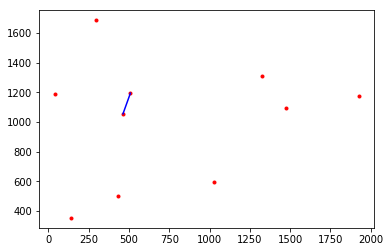

In [89]:
# 2017 S2 FIT5211 Assignment 1
# Duo Pan
# 27554074

import matplotlib.pyplot as plt

pointSet = createRandomPoints(10)
plt.plot(pointSet.getXS(), pointSet.getYS(),'ro',marker='.')
dis, p, q = pointSet.closestDisByDC()
plt.plot([p.x,q.x],[p.y,q.y],'b')
plt.show()